## Árboles de decisión

In [1]:
#Importamos las librerias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# Especifica los nombres de las columnas manualmente
column_names = ["cultivars","alcohol", "malic_acid", "ash", "alcalinity_of_ash", "magnesium", "total_phenols", "flavanoids", "nonflavanoid_phenols", "proanthocyanins", "color_intensity", "hue", "diluted_wines", "proline"]

# cargar .data
data = pd.read_csv("wine.data", names=column_names, header=None, delimiter=',')

# ver 5 primeros registros
data.head(5)

,cultivars,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,diluted_wines,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
# ver cantidad de filas y columnas
data.shape

(178, 14)

In [4]:
# generar estadísticas (recuento, media, desviación estándar, mínimo, 25º percentil, mediana, 75º percentil y máximo para cada columna)
data.describe()

,cultivars,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


(array([59.,  0.,  0.,  0.,  0., 71.,  0.,  0.,  0., 48.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <BarContainer object of 10 artists>)

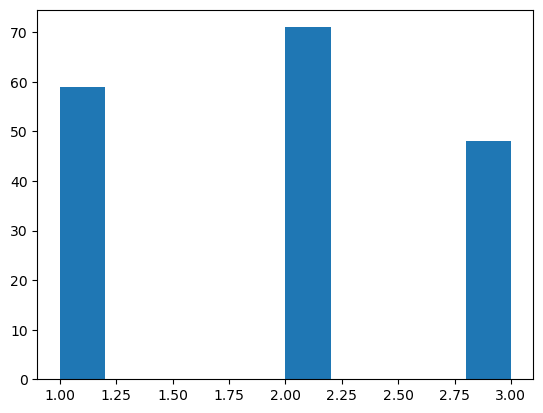

In [5]:
# elementos de cada clase (cultivares)
plt.hist(data.cultivars)

In [6]:
# seleccionar variable objetivo (cultivars)
target_col = [column_names[0]]
# seleccionar las demas variables
predictors_col = column_names[1:]
# ver arrays
print("target_col=" + str(target_col))
print("predictors_col=" + str(predictors_col))

target_col=['cultivars']
predictors_col=['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'diluted_wines', 'proline']


In [7]:
# asignar arrays a la varianle data
target = data[target_col]
predictors = data[predictors_col]

In [22]:
# selección para entrenamiento del algoritmo
# test_size 0.1966 -> apx al 20% para probar y el % restante para entrenamiento
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.1966, random_state=13)

In [23]:
# crear árbol de decisión
tree = DecisionTreeClassifier()

In [10]:
# entrenar árbol de decisión
arbol = tree.fit(X_train, y_train)

[Text(0.5, 0.9285714285714286, 'x[12] <= 755.0\ngini = 0.66\nsamples = 143\nvalue = [48, 56, 39]'),
 Text(0.25, 0.7857142857142857, 'x[6] <= 1.235\ngini = 0.501\nsamples = 88\nvalue = [2, 52, 34]'),
 Text(0.125, 0.6428571428571429, 'x[9] <= 3.56\ngini = 0.161\nsamples = 34\nvalue = [0, 3, 31]'),
 Text(0.0625, 0.5, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0]'),
 Text(0.1875, 0.5, 'gini = 0.0\nsamples = 31\nvalue = [0, 0, 31]'),
 Text(0.375, 0.6428571428571429, 'x[10] <= 0.63\ngini = 0.172\nsamples = 54\nvalue = [2, 49, 3]'),
 Text(0.3125, 0.5, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.4375, 0.5, 'x[12] <= 726.5\ngini = 0.075\nsamples = 51\nvalue = [2, 49, 0]'),
 Text(0.375, 0.35714285714285715, 'x[0] <= 13.175\ngini = 0.039\nsamples = 50\nvalue = [1, 49, 0]'),
 Text(0.3125, 0.21428571428571427, 'gini = 0.0\nsamples = 46\nvalue = [0, 46, 0]'),
 Text(0.4375, 0.21428571428571427, 'x[3] <= 17.75\ngini = 0.375\nsamples = 4\nvalue = [1, 3, 0]'),
 Text(0.375, 0.07142857142857142, 

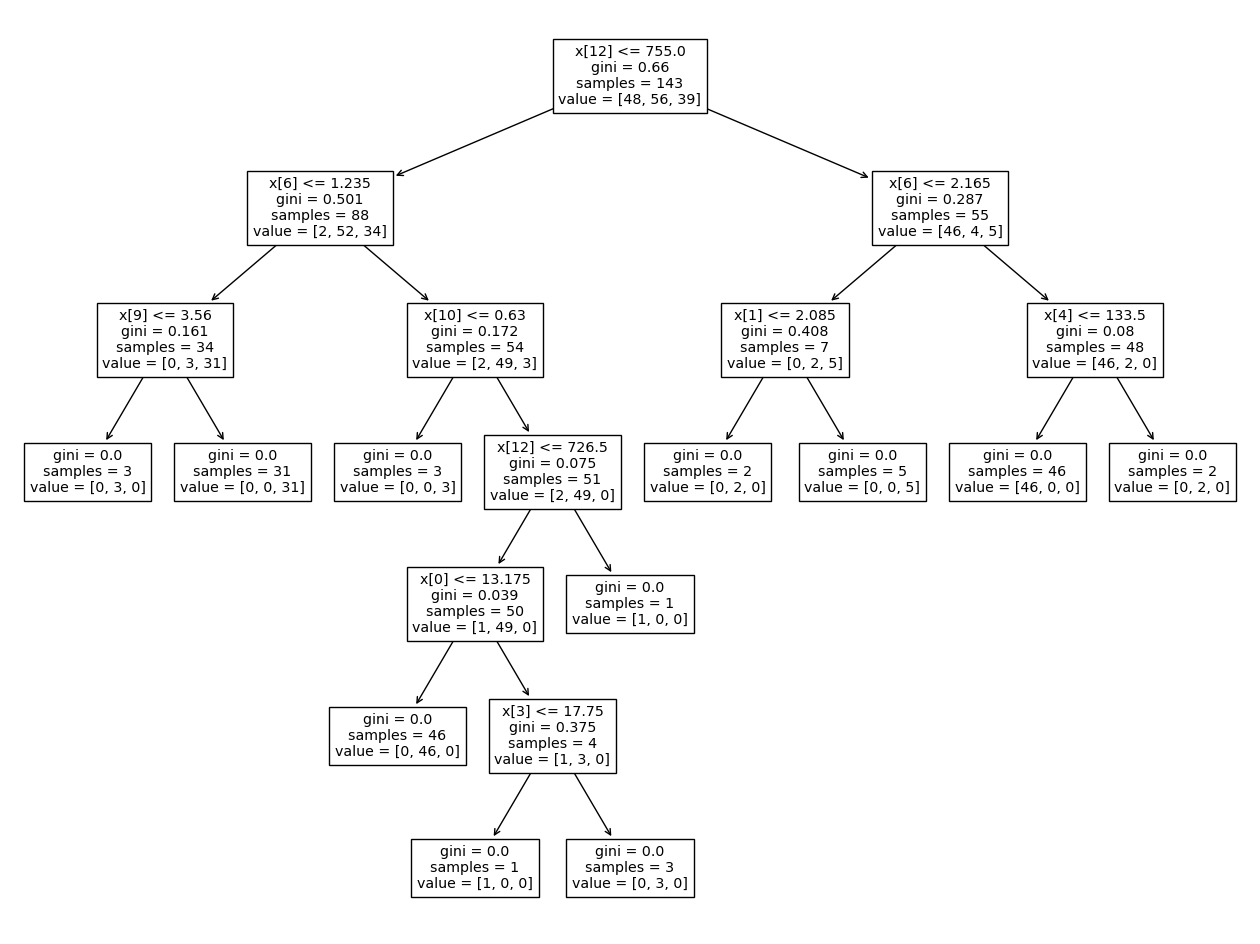

In [11]:
# Crear una figura más grande
plt.figure(figsize=(16, 12)) 
# graficar árbol
plot_tree(arbol)

In [12]:
# tomar el 20% apx de la data para ejecutar el test del modelo entrenado
predicciones = arbol.predict(X_test)

### Métricas

In [18]:
# Examinamos la matriz de confusión
pd.crosstab(np.array([y[0] for y in y_test.values.tolist()]), predicciones, rownames=['Actual'], colnames=['Predicciones'])

Predicciones,1,2,3
Actual,,,
1,11,0,0
2,2,13,0
3,0,1,8


In [19]:
# Calcula la matriz de confusión nativa
conf_matrix = confusion_matrix(y_test, predicciones)
print(conf_matrix)

[[11  0  0]
 [ 2 13  0]
 [ 0  1  8]]


In [20]:
# Calcula la precisión a partir de valores reales con las predicciones realizadas
accuracy = accuracy_score(y_test,predicciones)
accuracy

0.9142857142857143

In [21]:
# Calcula otras métricas como precisión, sensibilidad y especificidad
report = classification_report(y_test, predicciones)
print(report)

              precision    recall  f1-score   support

           1       0.85      1.00      0.92        11
           2       0.93      0.87      0.90        15
           3       1.00      0.89      0.94         9

    accuracy                           0.91        35
   macro avg       0.92      0.92      0.92        35
weighted avg       0.92      0.91      0.91        35



## Conclusiones

1. Accuracy (Precisión Global): el modelo tiene una precisión global del 0.91, lo que significa que clasifica correctamente el 91.43% de las muestras en el conjunto de prueba.

2. Precisión, Sensibilidad y F1-Score por Clase:  

La precision para las clases 1 y 2 es alta, indicando que la mayoría de las predicciones positivas para estas clases son correctas.

La recall (sensibilidad) para todas las clases es relativamente alta, lo que indica que el modelo es bueno para identificar ejemplos positivos reales.

La clase 3 tiene la precision más alta, lo que significa que la mayoría de las predicciones positivas para esta clase son correctas.

El F1-score es una medida que combina precision y recall. El F1-score es alto para todas las clases, lo que indica que el modelo tiene un buen equilibrio entre precisión y sensibilidad para todas las clases.


### En resumen:

Parece que el modelo de árbol de decisión funciona bien para clasificar los vinos en tres grupos diferentes. Hace un buen trabajo al equilibrar la precisión y la capacidad para encontrar los vinos correctos, y en general, tiene un buen rendimiento. No obstante, para entender completamente si es un buen modelo, necesitamos mirar más allá de solo una métrica como el accuracy y considerar qué es más importante para el problema y el proyecto en sí.